In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline


## Import IOS Zooplankton data and create dataframe

In [2]:
ls '/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv'

/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv


In [3]:
df=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 2012-2015 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [4]:
df

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,Phylum:,Class:,Order:,Family:,Name,Abundance(#/m3),Biomass(mg/m3),NumberOfSpecies,Station Diversity,Station Equitability
0,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Branchiopoda,Diplostraca,Podonidae,Podon *sp. s1,12.22541,0.06113,51,2.63,0.67
1,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Cirripedia,Thecostraca,NaN,Cirripedia *sp. nauplii s1,30.56351,1.22254,51,2.63,0.67
2,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Amphipoda,Hyperiidae,Themisto pacifica juvenile s1,6.11270,1.44871,51,2.63,0.67
3,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,NaN,Caridea *sp. zoea s1,3.05635,0.07030,51,2.63,0.67
4,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,Hippolytidae,Hippolytidae *sp. mysis s2,0.09551,0.06017,51,2.63,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60225,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Ctenophora,Tentaculata,Cydippida,Pleurobrachiidae,Pleurobrachia bachei s2,0.25316,0.31797,44,2.56,0.67
60226,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Ectoprocta,Gymnolaemata,NaN,NaN,Bryozoa *sp. cyphonautes s1,48.60759,0.06319,44,2.56,0.67
60227,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Mollusca,Bivalvia,Pholadomyoida,NaN,Bivalvia *sp. veligers s1,21.60338,0.01296,44,2.56,0.67
60228,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Mollusca,Cephalopoda,Teuthida,Gonatidae,Berryteuthis magister s2,0.08439,0.46414,44,2.56,0.67


In [5]:
df.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability'],
      dtype='object')

In [6]:
df['Biomass(mg/m3)']

0        0.06113
1        1.22254
2        1.44871
3        0.07030
4        0.06017
          ...   
60225    0.31797
60226    0.06319
60227    0.01296
60228    0.46414
60229    0.02808
Name: Biomass(mg/m3), Length: 60230, dtype: float64

#### Convert date to proper format

In [7]:
df['Date'][0],df['STN_TIME'][0]

('6/14/2012', '7:32')

In [8]:
df['Date'][1000:1020]

1000    6/15/2012
1001    6/15/2012
1002    6/15/2012
1003    6/15/2012
1004    6/15/2012
1005    6/15/2012
1006    6/15/2012
1007    6/15/2012
1008    6/15/2012
1009    6/15/2012
1010    6/15/2012
1011    6/15/2012
1012    6/15/2012
1013    6/15/2012
1014    6/15/2012
1015    6/15/2012
1016    6/15/2012
1017    6/15/2012
1018    6/15/2012
1019    6/15/2012
Name: Date, dtype: object

In [9]:
df['Date'][0].split('/')

['6', '14', '2012']

In [10]:
dateslist=list()

In [11]:
for el in df['Date']:
    dateslist.append(el.split('/'))

In [12]:
timeslist=list()
for el in df['STN_TIME']:
    timeslist.append(el.split(':'))

In [13]:
dts=list()
for ii,jj in zip(dateslist,timeslist):
    dts.append(dt.datetime(int(ii[2]),int(ii[0]),int(ii[1]),int(jj[0]),int(jj[1])))

In [14]:
df.loc[df.Twilight=='Daylight']['STN_TIME'].unique()

array(['7:32', '7:52', '3:30', '7:42', '7:49', '15:09', '16:30', '22:09',
       '22:27', '19:36', '19:53', '9:21', '9:35', '13:29', '13:45',
       '19:25', '19:43', '5:26', '5:43', '5:45', '5:47', '5:56', '5:59',
       '8:38', '8:39', '8:40', '8:41', '8:57', '11:10', '11:44', '11:45',
       '11:47', '11:48', '11:49', '12:40', '12:42', '15:14', '15:15',
       '15:16', '15:17', '15:18', '17:54', '17:55', '17:57', '17:58',
       '17:59', '5:39', '6:05', '14:47', '15:02', '19:13', '19:30',
       '14:32', '14:49', '20:04', '20:24', '20:27', '20:47', '9:37',
       '9:48', '13:57', '14:17', '19:41', '19:59', '7:18', '7:53', '9:25',
       '12:57', '13:09', '7:30', '7:45', '13:33', '13:36', '13:38',
       '10:00', '10:30', '11:00', '11:30', '12:30', '13:00', '13:30',
       '16:00', '17:00', '9:29', '10:26', '11:19', '13:39', '9:16',
       '10:04', '10:42', '11:03', '9:00', '9:41', '10:17', '10:40',
       '12:00', '9:33', '10:13', '11:11', '12:02', '12:32', '13:22',
       '9:57', '

In [15]:
df['dtUTC']=et.pac_to_utc(dts) #convert from Pac time to UTC

In [16]:
dtsutc=et.pac_to_utc(dts)

### Start by creating a group of zooplankton taxa of interest

In [17]:
df['Order:'].unique()

array(['Diplostraca', 'Thecostraca', 'Amphipoda', 'Decapoda',
       'Euphausiacea', 'Calanoida', 'Cyclopoida', 'Poecilostomatoida',
       'Halocyprida', 'Aphragmophora', 'Copelata', 'Leptothecate',
       'Siphonophorae', 'Trachylina', 'Cydippida', nan, 'Pholadomyoida',
       'Neotaenioglossa', 'Thecosomata', 'Aciculata', 'Canalipalpata',
       'Osmeriformes', 'Perciformes', 'Beroida', 'Teuthida',
       'Gymnosomata', 'Isopoda', 'Siphonostomatoida', 'Anthoathecatae',
       'Scorpaeniformes', 'Phragmophora', 'Clupeiformes', 'Ophiurida',
       'Gadiformes', 'Semaeostomeae', 'Cumacea', 'Echinoida',
       'Harpacticoida', 'Pleuronectiformes', 'Tricladida', 'Myodocopida',
       'Phaeogromia', 'Noctilucales', 'Octopoda', 'Actiniaria',
       'Foraminiferida', 'Monstrilloida', 'Oligotrichida', 'Mysida',
       'Acariformes', 'Lophogastrida', 'Ophidiiformes',
       'Thalassocalycida', 'Doliolida', 'Lepadomorpha', 'Cephalaspidea',
       'Sygnathiformes'], dtype=object)

In [18]:
colList=('Amphipoda', 'Decapoda','Euphausiacea', 'Calanoida', 'Cyclopoida', 
    'Poecilostomatoida','Copelata','Harpacticoida',)

In [19]:
df.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability', 'dtUTC'],
      dtype='object')

In [20]:
df.loc[0]

Key                                                      IOS2012005000901
region_name                                    Northern Strait of Georgia
Station                                                                22
PROJECT                                                         Str. Geo.
lon                                                              -124.272
lat                                                                 49.67
Date                                                            6/14/2012
STN_TIME                                                             7:32
Twilight                                                         Daylight
Net_Type                                                         SCOR VNH
Mesh_Size(um)                                                         236
Net_Mouth_Dia(m)                                                     0.56
DEPTH_STRT1                                                            50
DEPTH_END1                            

In [21]:
towIDlist=['Key', 'region_name', 'Station',  'lon', 'lat','Date', 'dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)']

In [22]:
towIDlist2=['Key', 'region_name', 'Station',  'lon', 'lat', 'Date','dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)','CTD']

In [23]:
len(df.groupby(towIDlist)),len(df.groupby(towIDlist2)),len(df.groupby(['Key']))

(654, 12694, 654)

In [24]:
# Key is a unique identifier for each tow
# do not group by CTD due to NaN values

### Create a biomass dataframe

In [25]:
biomassDF=df.groupby(towIDlist,as_index=False).first()\
     .loc[:,towIDlist].copy(deep=True)

In [26]:
biomassDF

,Key,region_name,Station,lon,lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),DEPTH_STRT1,DEPTH_END1,Bottom Depth(m)
0,IOS2012005000901,Northern Strait of Georgia,22,-124.272,49.670,6/14/2012,2012-06-14 14:32:00,Daylight,SCOR VNH,236,50,0,352
1,IOS2012005001001,Northern Strait of Georgia,22,-124.272,49.670,6/14/2012,2012-06-14 14:52:00,Daylight,SCOR VNH,236,345,0,352
2,IOS2012005002101,Northern Strait of Georgia,11,-124.722,49.710,6/14/2012,2012-06-14 07:00:00,Night,SCOR VNH,236,50,0,307
3,IOS2012005002201,Northern Strait of Georgia,11,-124.722,49.710,6/14/2012,2012-06-14 07:05:00,Night,SCOR VNH,236,300,0,307
4,IOS2012005002901,Northern Strait of Georgia,CPF2,-124.499,49.466,6/15/2012,2012-06-15 10:00:00,Night,SCOR VNH,236,50,0,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,SOO2015095000101,Tidal Mixed,CLO-42,-123.345,48.394,4/27/2015,2015-04-27 17:37:00,Daylight,SCOR VNH,236,58,0,72
650,SOO2015095000401,Tidal Mixed,CB01,-123.318,48.344,4/30/2015,2015-04-30 19:00:00,Daylight,SCOR VNH,236,54,0,64
651,SOO2015095000501,Tidal Mixed,CLO-41,-123.345,48.395,7/9/2015,2015-07-09 19:25:00,Daylight,SCOR VNH,236,42,0,64
652,SOO2015095000701,Tidal Mixed,CB01,-123.318,48.344,7/27/2015,2015-07-27 19:06:00,Daylight,SCOR VNH,236,28,0,60


In [27]:
def getbiomass(colname,key,origdf):        
    biomassArray=origdf.loc[(origdf.Key==key)&(origdf['Order:']==colname),
                    ['Biomass(mg/m3)']]
    biomass=np.nansum(biomassArray)
    
    return biomass

In [28]:
for icol in colList:
    biomassDF[icol]=[getbiomass(icol,ikey,df) for ikey in biomassDF['Key']]

In [29]:
biomassDF

,Key,region_name,Station,lon,lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,DEPTH_END1,Bottom Depth(m),Amphipoda,Decapoda,Euphausiacea,Calanoida,Cyclopoida,Poecilostomatoida,Copelata,Harpacticoida
0,IOS2012005000901,Northern Strait of Georgia,22,-124.272,49.670,6/14/2012,2012-06-14 14:32:00,Daylight,SCOR VNH,236,...,0,352,1.44871,0.13047,0.65310,14.21881,0.35546,0.59598,0.91691,0.0
1,IOS2012005001001,Northern Strait of Georgia,22,-124.272,49.670,6/14/2012,2012-06-14 14:52:00,Daylight,SCOR VNH,236,...,0,352,2.57318,0.23591,0.16876,17.75443,0.37904,0.23747,1.15807,0.0
2,IOS2012005002101,Northern Strait of Georgia,11,-124.722,49.710,6/14/2012,2012-06-14 07:00:00,Night,SCOR VNH,236,...,0,307,8.45483,5.76780,0.07720,57.97920,1.18232,0.31802,0.01917,0.0
3,IOS2012005002201,Northern Strait of Georgia,11,-124.722,49.710,6/14/2012,2012-06-14 07:05:00,Night,SCOR VNH,236,...,0,307,23.57762,3.69101,4.27121,68.21370,1.32736,0.58393,0.14046,0.0
4,IOS2012005002901,Northern Strait of Georgia,CPF2,-124.499,49.466,6/15/2012,2012-06-15 10:00:00,Night,SCOR VNH,236,...,0,325,124.31430,24.79259,14.47768,34.16656,0.77657,0.14856,0.36571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,SOO2015095000101,Tidal Mixed,CLO-42,-123.345,48.394,4/27/2015,2015-04-27 17:37:00,Daylight,SCOR VNH,236,...,0,72,1.81260,0.93396,0.01031,6.19344,0.00191,0.01527,0.69466,0.0
650,SOO2015095000401,Tidal Mixed,CB01,-123.318,48.344,4/30/2015,2015-04-30 19:00:00,Daylight,SCOR VNH,236,...,0,64,5.31255,2.51960,0.02307,10.53489,0.00427,0.04784,0.47838,0.0
651,SOO2015095000501,Tidal Mixed,CLO-41,-123.345,48.395,7/9/2015,2015-07-09 19:25:00,Daylight,SCOR VNH,236,...,0,64,0.00000,0.56055,0.02636,5.75176,0.00000,0.03222,3.30984,0.0
652,SOO2015095000701,Tidal Mixed,CB01,-123.318,48.344,7/27/2015,2015-07-27 19:06:00,Daylight,SCOR VNH,236,...,0,60,1.29901,1.55372,0.06543,2.18596,0.00539,0.02079,3.39476,0.0


### Import model data for comparison with observations

In [30]:
import netCDF4 as nc

In [31]:
ftemp=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

In [32]:
ftemp.variables.keys()

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])

In [33]:
ftemp.variables['e3t_0']

<class 'netCDF4._netCDF4.Variable'>
float64 e3t_0(t, z, y, x)
    _FillValue: nan
    standard_name: e3t_0
    long_name: grid spacing on T-grid in w direction
    units: m
unlimited dimensions: t
current shape = (1, 40, 898, 398)
filling on

In [34]:
ftemp.variables['e3t_1d'][:]

masked_array(data=[[ 1.00000115,  1.00000501,  1.00001253,  1.00002718,
                     1.0000557 ,  1.00011125,  1.00021946,  1.0004302 ,
                     1.00084067,  1.00164012,  1.0031971 ,  1.00622914,
                     1.01213271,  1.02362358,  1.04597551,  1.08940061,
                     1.17356428,  1.33592899,  1.64636781,  2.22990285,
                     3.29248567,  5.11998508,  7.97451506, 11.8252972 ,
                    16.10792044, 19.95870258, 22.81323256, 24.64073198,
                    25.70331479, 26.28684983, 26.59728865, 26.75965336,
                    26.84381704, 26.88724213, 26.90959407, 26.92108493,
                    26.9269885 , 26.93002054, 26.93157752, 26.93237697]],
             mask=False,
       fill_value=1e+20)

In [35]:
fdict={'ptrc_T':1,'grid_T':1}
start_date = dt.datetime(2012,1,1)
end_date = dt.datetime(2015,12,31)
flen=1 # number of days per model output file. always 1 for 201905 and 201812 model runs
namfmt='nowcast' # for 201905 and 201812 model runs, this should always be 'nowcast'
# filemap is dictionary of the form variableName: fileType, where variableName is the name
# of the variable you want to extract and fileType designates the type of 
# model output file it can be found in (usually ptrc_T for biology, grid_T for temperature and 
# salinity)
filemap={'microzooplankton':'ptrc_T','mesozooplankton':'ptrc_T'}
# fdict is a dictionary mappy file type to its time resolution. Here, 1 means hourly output
# (1h file) and 24 means daily output (1d file). In certain runs, multiple time resolutions 
# are available
fdict={'ptrc_T':1,'grid_T':1}

In [36]:
PATH= '/results2/SalishSea/nowcast-green.201905/'

In [37]:
#renaming columns to match with model columns
biomassDF.rename(columns={'lon':'Lon','lat':'Lat'},inplace=True) 

In [38]:
biomassDF.keys()

Index(['Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1',
       'Bottom Depth(m)', 'Amphipoda', 'Decapoda', 'Euphausiacea', 'Calanoida',
       'Cyclopoida', 'Poecilostomatoida', 'Copelata', 'Harpacticoida'],
      dtype='object')

In [39]:
biomassDF.rename(columns={'DEPTH_STRT1':'Z_lower','DEPTH_END1':'Z_upper'},inplace=True)

In [40]:
biomassDF['Year']=[ii.year for ii in biomassDF['dtUTC']]
biomassDF['Month']=[ii.month for ii in biomassDF['dtUTC']]
biomassDF['YD']=et.datetimeToYD(biomassDF['dtUTC'])

#### Need to convert biomass from mg DW to mg C and then convert to N using a known C:N

In [41]:
biomassDF['Amphipoda']=biomassDF['Amphipoda']*0.45/8.5
biomassDF['Decapoda']=biomassDF['Decapoda']*0.45/8.5
biomassDF['Euphausiacea']=biomassDF['Euphausiacea']*0.45/8.5
biomassDF['Calanoida']=biomassDF['Calanoida']*0.45/8.5
biomassDF['Cyclopoida']=biomassDF['Cyclopoida']*0.45/8.5
biomassDF['Poecilostomatoida']=biomassDF['Poecilostomatoida']*0.45/8.5
biomassDF['Copelata']=biomassDF['Copelata']*0.45/8.5
biomassDF['Harpacticoida']=biomassDF['Harpacticoida']*0.45/8.5



In [42]:
biomassDF['Total']=(biomassDF['Amphipoda']+biomassDF['Decapoda']+biomassDF['Euphausiacea']+biomassDF['Calanoida']+biomassDF['Cyclopoida']+\
                    biomassDF['Poecilostomatoida']+biomassDF['Copelata']+biomassDF['Harpacticoida'])

In [43]:
biomassDF['TotalCalRemoved']=(biomassDF['Amphipoda']+biomassDF['Decapoda']+biomassDF['Euphausiacea']+biomassDF['Cyclopoida']+\
                    biomassDF['Poecilostomatoida']+biomassDF['Copelata']+biomassDF['Harpacticoida'])

In [44]:
biomassDF2013=biomassDF[biomassDF.Year==2013]

In [45]:
biomassDF2013

,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,Calanoida,Cyclopoida,Poecilostomatoida,Copelata,Harpacticoida,Year,Month,YD,Total,TotalCalRemoved
54,IOS2013012001701,Central Strait of Georgia,41,-123.372,49.055,4/11/2013,2013-04-11 12:39:00,Daylight,SCOR VNH,236,...,14.923122,0.009088,0.092197,0.628174,0.0,2013,4,101,17.729975,2.806852
55,IOS2013012001801,Central Strait of Georgia,41,-123.389,49.055,4/11/2013,2013-04-11 13:05:00,Daylight,SCOR VNH,236,...,5.338138,0.023603,0.110048,0.142832,0.0,2013,4,101,6.612463,1.274324
56,IOS2013012002501,Central Strait of Georgia,CPF1,-124.086,49.367,4/11/2013,2013-04-11 21:47:00,Daylight,SCOR VNH,236,...,4.493307,0.114438,0.100014,6.594132,0.0,2013,4,101,12.731599,8.238292
57,IOS2013012002601,Central Strait of Georgia,CPF1,-124.088,49.367,4/11/2013,2013-04-11 22:02:00,Daylight,SCOR VNH,236,...,1.932206,0.030805,0.034816,0.951254,0.0,2013,4,101,3.483791,1.551585
58,IOS2013012003101,Northern Strait of Georgia,CPF2,-124.500,49.467,4/11/2013,2013-04-12 02:13:00,Daylight,SCOR VNH,236,...,2.605497,0.106238,0.085435,0.828884,0.0,2013,4,102,5.243691,2.638194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,PBS2013043000401,Central Strait of Georgia,GS01,-123.398,48.936,6/26/2013,2013-06-26 16:38:00,Daylight,Bongo VNH,253,...,1.169818,0.035715,0.009841,0.006278,0.0,2013,6,177,4.844144,3.674325
493,PBS2013043005701,Northern Strait of Georgia,GS11,-124.569,49.484,6/30/2013,2013-06-30 14:06:00,Daylight,Bongo VNH,253,...,1.194674,0.012506,0.014294,0.002552,0.0,2013,6,181,4.488663,3.293989
494,PBS2013045000201,Central Strait of Georgia,CPF1,-124.077,49.370,6/25/2013,2013-06-25 16:31:00,Daylight,Bongo VNH,253,...,0.541084,0.017641,0.004371,0.000000,0.0,2013,6,176,1.301756,0.760672
495,PBS2013045000401,Central Strait of Georgia,GEO1,-123.750,49.249,6/25/2013,2013-06-25 19:20:00,Daylight,Bongo VNH,253,...,1.108199,0.010443,0.002014,0.010999,0.0,2013,6,176,1.953721,0.845522


In [46]:
data=et.matchData(biomassDF,filemap,fdict,start_date,end_date,'nowcast',PATH,1,quiet=False,method='vertNet');

In [47]:
data

,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,Month,YD,Total,TotalCalRemoved,j,i,mod_microzooplankton,mod_mesozooplankton,k_upper,k_lower
0,IOS2012025013601,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:26:00,Daylight,Bongo VNH,236,...,5,142,11.557895,4.540731,583,162,0.134706,0.216811,0,34
1,IOS2012025013701,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:43:00,Daylight,MPS VNH,200,...,5,142,11.668040,2.831936,583,162,0.000422,0.034365,32,34
2,IOS2012025013702,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:45:00,Daylight,MPS VNH,200,...,5,142,10.228034,0.707909,583,162,0.001816,0.059686,30,32
3,IOS2012025013703,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:47:00,Daylight,MPS VNH,200,...,5,142,1.565126,0.800177,583,162,0.016602,0.101699,26,30
4,IOS2012025013704,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:56:00,Daylight,MPS VNH,200,...,5,142,4.247941,3.240510,583,162,0.089635,0.266278,23,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,PSF2015097005001,Northern Strait of Georgia,IS-3,-124.287,49.655,10/5/2015,2015-10-05 18:43:00,Daylight,Ring VNH,250,...,10,278,0.890509,0.436661,604,217,0.057682,0.424223,0,28
650,PSF2015098005701,Northern Strait of Georgia,BS-3,-124.666,49.692,10/5/2015,2015-10-05 19:15:00,Daylight,Ring VNH,250,...,10,278,3.434237,1.946707,639,166,0.058821,0.396426,0,28
651,PSF2015098005801,Baynes Sound,BS-1,-124.867,49.608,10/5/2015,2015-10-05 20:38:00,Daylight,Ring VNH,250,...,10,278,1.651208,0.872863,636,126,0.194869,1.209480,0,22
652,PSF2015097005101,Nearshore-North East,IS-2,-124.083,49.637,10/5/2015,2015-10-05 20:40:00,Daylight,Ring VNH,250,...,10,278,7.136612,6.801448,587,245,0.159315,1.060016,0,21


In [48]:
data.keys()

Index(['Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Z_lower', 'Z_upper',
       'Bottom Depth(m)', 'Amphipoda', 'Decapoda', 'Euphausiacea', 'Calanoida',
       'Cyclopoida', 'Poecilostomatoida', 'Copelata', 'Harpacticoida', 'Year',
       'Month', 'YD', 'Total', 'TotalCalRemoved', 'j', 'i',
       'mod_microzooplankton', 'mod_mesozooplankton', 'k_upper', 'k_lower'],
      dtype='object')

In [49]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

In [50]:
# define inverse log transform with same shift
def logt_inv(y):
    return 10**y-.001

In [51]:
#create columns for log10 +0.001 transformed zooplankton
data['L10Amphipoda']=logt(data['Amphipoda'])
data['L10Decapoda']=logt(data['Decapoda'])
data['L10Euphausiacea']=logt(data['Euphausiacea'])
data['L10Calanoida']=logt(data['Calanoida'])
data['L10Cyclopoida']=logt(data['Cyclopoida'])
data['L10Poecilostomatoida']=logt(data['Poecilostomatoida'])
data['L10Copelata']=logt(data['Copelata'])
data['L10Harpacticoida']=logt(data['Harpacticoida'])
data['L10Total']=logt(data['Total'])
data['L10TotalCalRemoved']=logt(data['TotalCalRemoved'])
data['L10mod_mesozooplankton']=logt(data['mod_mesozooplankton'])
data['L10mod_microzooplankton']=logt(data['mod_microzooplankton'])



In [52]:
#look at data for individual years
View2012=data.loc[data.Year==2012]
View2013=data.loc[data.Year==2013]
View2014=data.loc[data.Year==2014]
View2015=data.loc[data.Year==2015]


In [53]:
#look at data for a specific region
ViewCentralSoG=data.loc[data.region_name=='Central Strait of Georgia']

In [54]:
#look at data for an individual station
ViewGEO1=data.loc[data.Station=='GEO1']

In [55]:
View2015

,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,L10Euphausiacea,L10Calanoida,L10Cyclopoida,L10Poecilostomatoida,L10Copelata,L10Harpacticoida,L10Total,L10TotalCalRemoved,L10mod_mesozooplankton,L10mod_microzooplankton
310,IOS2015001000201A,Tidal Mixed,59,-123.245,48.614,2/10/2015,2015-02-11 05:06:00,Night,Bongo VNH,236,...,-1.364480,-0.537596,-2.463969,-2.785421,-2.075550,-2.776122,-0.322741,-0.729054,-0.603813,-1.522322
311,IOS2015001000701A,Juan de Fuca,JF02,-124.002,48.300,2/11/2015,2015-02-11 12:09:00,Night,Bongo VNH,236,...,-1.142543,-0.750369,-2.959002,-2.654004,-2.469017,-3.000000,-0.562228,-1.011724,-0.787804,-2.019568
312,IOS2015099000101,Northern Strait of Georgia,GEO_STR,-124.092,49.583,2/13/2015,2015-02-14 04:03:00,Night,SCOR VNH,236,...,-1.174449,-0.077251,-1.707842,-2.891694,-2.148134,-3.000000,0.092092,-0.397762,-0.925768,-1.599622
313,IOS2015099000201,Central Strait of Georgia,GEO1,-123.748,49.252,2/15/2015,2015-02-15 09:22:00,Night,SCOR VNH,236,...,-0.259034,-0.104794,-1.720521,-2.767826,-2.239742,-2.895473,0.246594,-0.008871,-0.969032,-1.698102
314,IOS2015099000301,Northern Strait of Georgia,11,-124.718,49.705,2/15/2015,2015-02-15 14:36:00,Daylight,SCOR VNH,236,...,-1.140934,-0.350842,-1.700535,-2.815476,-1.720448,-3.000000,-0.042133,-0.334677,-1.000341,-1.600185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,PSF2015097005001,Northern Strait of Georgia,IS-3,-124.287,49.655,10/5/2015,2015-10-05 18:43:00,Daylight,Ring VNH,250,...,-1.418398,-0.342134,-1.720195,-2.382229,-0.999047,-3.000000,-0.049874,-0.358862,-0.371383,-1.231496
650,PSF2015098005701,Northern Strait of Georgia,BS-3,-124.666,49.692,10/5/2015,2015-10-05 19:15:00,Daylight,Ring VNH,250,...,0.141457,0.172758,-1.691277,-2.518515,-1.461287,-3.000000,0.535957,0.289524,-0.400744,-1.223148
651,PSF2015098005801,Baynes Sound,BS-1,-124.867,49.608,10/5/2015,2015-10-05 20:38:00,Daylight,Ring VNH,250,...,-3.000000,-0.108270,-0.626575,-1.913368,-0.233247,-2.016759,0.218065,-0.058557,0.082958,-0.708035
652,PSF2015097005101,Nearshore-North East,IS-2,-124.083,49.637,10/5/2015,2015-10-05 20:40:00,Daylight,Ring VNH,250,...,-2.597789,-0.473448,-1.664176,-1.746149,0.800185,-3.000000,0.853553,0.832665,0.025722,-0.795025


In [56]:
#old groupings after following a tutorial (ignore as I have streamlined this below)
monthCala=data.groupby(['Month', 'Calanoida'], as_index=False).mean()
monthEuph=data.groupby(['Month', 'Euphausiacea'], as_index=False).mean()
monthAmph=data.groupby(['Month', 'Amphipoda'], as_index=False).mean()
monthCrab=data.groupby(['Month', 'Decapoda'], as_index=False).mean()
monthNonCala=data.groupby(['Month', 'Poecilostomatoida'], as_index=False).mean()
monthLarv=data.groupby(['Month', 'Copelata'], as_index=False).mean()
monthModMicro=data.groupby(['Month', 'mod_microzooplankton'], as_index=False).mean()
monthModMeso=data.groupby(['Month', 'mod_mesozooplankton'], as_index=False).mean()
monthTotal=data.groupby(['Month', 'Total'], as_index=False).mean()
monthTotalCalRemoved=data.groupby(['Month', 'TotalCalRemoved'], as_index=False).mean()

### Calculate Mean and SEMs

In [57]:
#monthly mean and SEM for entire SoG
monthlymean=data.groupby(['Month']).mean()

In [58]:
monthlysem=data.groupby(['Month']).sem()

In [59]:
#monthly mean and SEM for Central SoG Only
monthlymeanCentral=ViewCentralSoG.groupby(['Month']).mean()


In [60]:
monthlysemCentral=ViewCentralSoG.groupby(['Month']).sem()

In [61]:
#monthly mean and SEM for station GEO1 only
monthlymeanGEO1=ViewGEO1.groupby(['Month']).mean()


In [62]:
monthlysemGEO1=ViewGEO1.groupby(['Month']).sem()

In [63]:
monthlymean2012=View2012.groupby(['Month']).mean()
monthlymean2013=View2013.groupby(['Month']).mean()
monthlymean2014=View2014.groupby(['Month']).mean()
monthlymean2015=View2015.groupby(['Month']).mean()

In [64]:
monthlysem2012=View2012.groupby(['Month']).sem()
monthlysem2013=View2013.groupby(['Month']).sem()
monthlysem2014=View2014.groupby(['Month']).sem()
monthlysem2015=View2015.groupby(['Month']).sem()

## Figure showing observation locations of IOS zooplankton sampling

IndexError: tuple index out of range

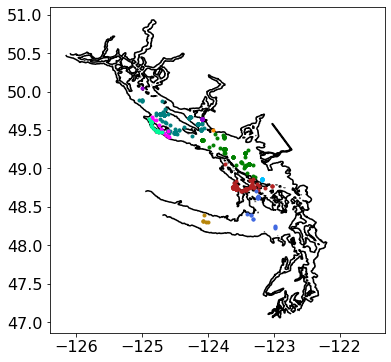

In [65]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('teal','green','firebrick','darkorange','darkviolet','fuchsia',
        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue')
datreg=dict()
for ind, iregion in enumerate(data.region_name.unique()):
    datreg[iregion] = data.loc[data.region_name==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47,51)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -120);
ax.set_title('Observation Locations');
ax.legend(bbox_to_anchor=(1.1, 1.05))




In [66]:
np.shape([monthlymean['L10Calanoida']-monthlysem['L10Calanoida'],
 monthlymean['L10Calanoida']+monthlysem['L10Calanoida']])


(2, 9)

(0.0, 15.0)

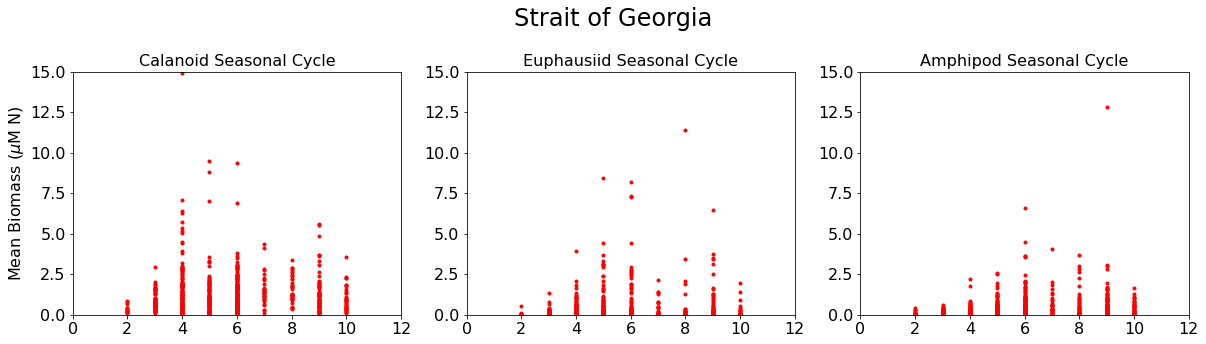

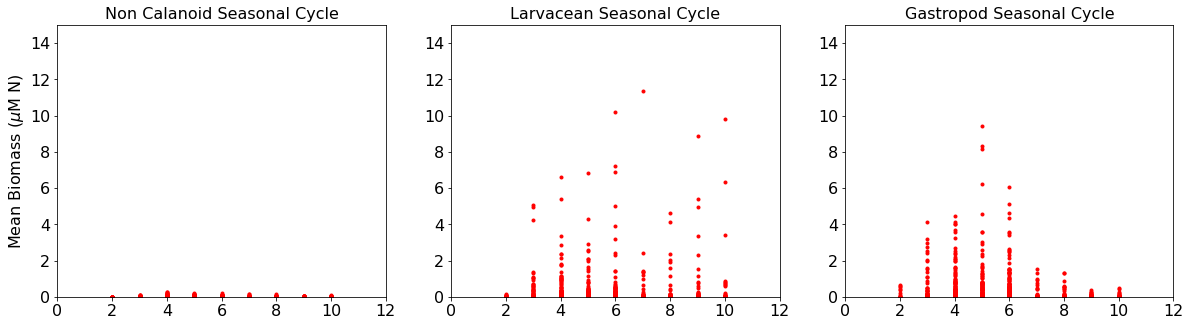

In [93]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Strait of Georgia', fontsize=24)
fig.subplots_adjust(top=0.8)
ax[0].plot(monthCala['Month'],monthCala['Calanoida'],'r.')
ax[1].plot(monthEuph['Month'],monthEuph['Euphausiacea'],'r.')
ax[2].plot(monthAmph['Month'],monthAmph['Amphipoda'],'r.')
ax[0].set_title('Calanoid Seasonal Cycle')
ax[1].set_title('Euphausiid Seasonal Cycle')
ax[2].set_title('Amphipod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass ($\mu$M N)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[0].set_ylim(0,15)
ax[1].set_ylim(0,15)
ax[2].set_ylim(0,15)

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(monthNonCala['Month'],monthNonCala['Poecilostomatoida'],'r.')
ax[1].plot(monthLarv['Month'],monthLarv['Copelata'],'r.')
ax[2].plot(monthCrab['Month'],monthCrab['Decapoda'],'r.')
ax[0].set_title('Non Calanoid Seasonal Cycle')
ax[1].set_title('Larvacean Seasonal Cycle')
ax[2].set_title('Gastropod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass ($\mu$M N)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[0].set_ylim(0,15)
ax[1].set_ylim(0,15)
ax[2].set_ylim(0,15)

(0.0, 0.6)

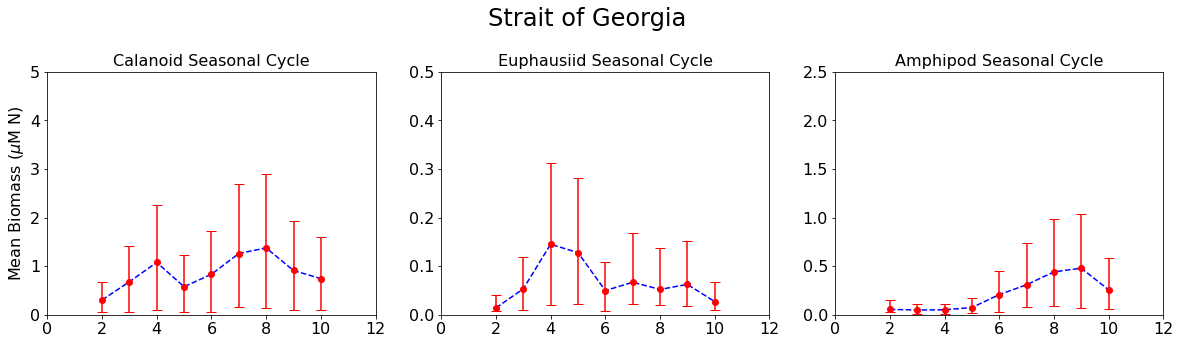

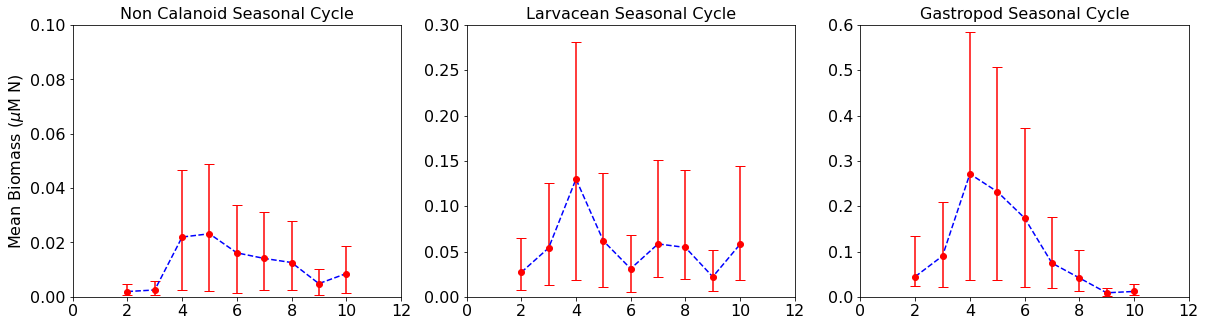

In [94]:


fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Strait of Georgia', fontsize=24)
fig.subplots_adjust(top=0.8)
ax[0].errorbar(monthlymean.index,logt_inv(monthlymean['L10Calanoida']),
               yerr=logt_inv(np.array([monthlymean['L10Calanoida']-monthlysem['L10Calanoida'],
                 monthlymean['L10Calanoida']+monthlysem['L10Calanoida']])),
               fmt='ro',capsize=5)
ax[0].plot(logt_inv(monthlymean['L10Calanoida']),'b--')
ax[1].errorbar(monthlymean.index,logt_inv(monthlymean['L10Euphausiacea']),
               yerr=logt_inv(np.array([monthlymean['L10Euphausiacea']-monthlysem['L10Euphausiacea'],
                 monthlymean['L10Euphausiacea']+monthlysem['L10Euphausiacea']])),
               fmt='ro',capsize=5)
ax[1].plot(logt_inv(monthlymean['L10Euphausiacea']),'b--')
ax[2].errorbar(monthlymean.index,logt_inv(monthlymean['L10Amphipoda']),
               yerr=logt_inv(np.array([monthlymean['L10Amphipoda']-monthlysem['L10Amphipoda'],
                 monthlymean['L10Amphipoda']+monthlysem['L10Amphipoda']])),
               fmt='ro',capsize=5)
ax[2].plot(logt_inv(monthlymean['L10Amphipoda']),'b--')
ax[0].set_title('Calanoid Seasonal Cycle')
ax[1].set_title('Euphausiid Seasonal Cycle')
ax[2].set_title('Amphipod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass ($\mu$M N)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[0].set_ylim(0,5)
ax[1].set_ylim(0,.5)
ax[2].set_ylim(0,2.5)

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].errorbar(monthlymean.index,logt_inv(monthlymean['L10Poecilostomatoida']),
               yerr=logt_inv(np.array([monthlymean['L10Poecilostomatoida']-monthlysem['L10Poecilostomatoida'],
                 monthlymean['L10Poecilostomatoida']+monthlysem['L10Poecilostomatoida']])),
               fmt='ro',capsize=5)
ax[0].plot(logt_inv(monthlymean['L10Poecilostomatoida']),'b--')
ax[1].errorbar(monthlymean.index,logt_inv(monthlymean['L10Copelata']),
               yerr=logt_inv(np.array([monthlymean['L10Copelata']-monthlysem['L10Copelata'],
                 monthlymean['L10Copelata']+monthlysem['L10Copelata']])),
               fmt='ro',capsize=5)
ax[1].plot(logt_inv(monthlymean['L10Copelata']),'b--')
ax[2].errorbar(monthlymean.index,logt_inv(monthlymean['L10Decapoda']),
               yerr=logt_inv(np.array([monthlymean['L10Decapoda']-monthlysem['L10Decapoda'],
                 monthlymean['L10Decapoda']+monthlysem['L10Decapoda']])),
               fmt='ro',capsize=5)
ax[2].plot(logt_inv(monthlymean['L10Decapoda']),'b--')
ax[0].set_title('Non Calanoid Seasonal Cycle')
ax[1].set_title('Larvacean Seasonal Cycle')
ax[2].set_title('Gastropod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass ($\mu$M N)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[0].set_ylim(0,.1)
ax[1].set_ylim(0,.3)
ax[2].set_ylim(0,.6)

(0.0, 0.4)

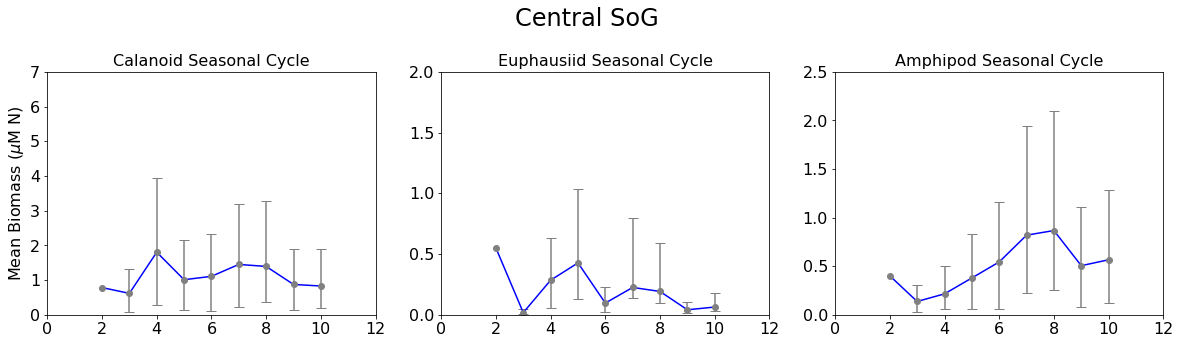

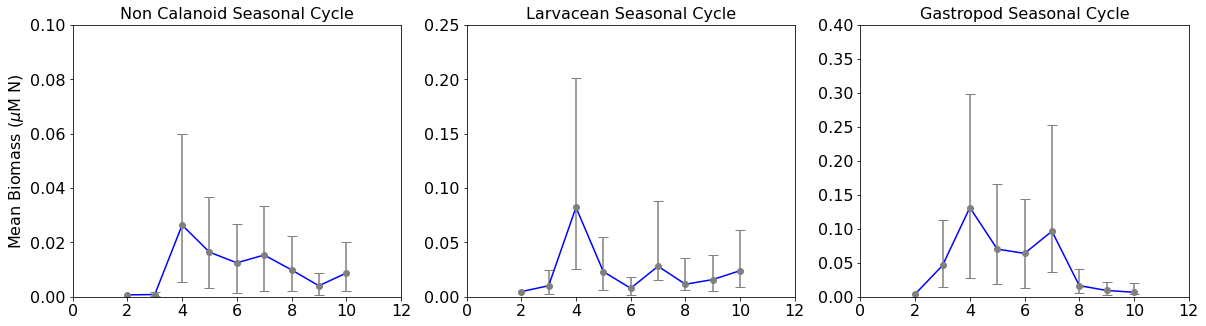

In [95]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Central SoG', fontsize=24)
fig.subplots_adjust(top=0.8)
ax[0].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10Calanoida']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10Calanoida']-monthlysemCentral['L10Calanoida'],
                 monthlymeanCentral['L10Calanoida']+monthlysemCentral['L10Calanoida']])),
               fmt='o',color='gray',capsize=5)
ax[0].plot(logt_inv(monthlymeanCentral['L10Calanoida']),'b-')
ax[1].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10Euphausiacea']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10Euphausiacea']-monthlysemCentral['L10Euphausiacea'],
                 monthlymeanCentral['L10Euphausiacea']+monthlysemCentral['L10Euphausiacea']])),
               fmt='o',color='gray',capsize=5)
ax[1].plot(logt_inv(monthlymeanCentral['L10Euphausiacea']),'b-')
ax[2].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10Amphipoda']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10Amphipoda']-monthlysemCentral['L10Amphipoda'],
                 monthlymeanCentral['L10Amphipoda']+monthlysemCentral['L10Amphipoda']])),
               fmt='o',color='gray',capsize=5)
ax[2].plot(logt_inv(monthlymeanCentral['L10Amphipoda']),'b-')
ax[0].set_title('Calanoid Seasonal Cycle')
ax[1].set_title('Euphausiid Seasonal Cycle')
ax[2].set_title('Amphipod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass ($\mu$M N)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[0].set_ylim(0,7)
ax[1].set_ylim(0,2)
ax[2].set_ylim(0,2.5)

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10Poecilostomatoida']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10Poecilostomatoida']-monthlysemCentral['L10Poecilostomatoida'],
                 monthlymeanCentral['L10Poecilostomatoida']+monthlysemCentral['L10Poecilostomatoida']])),
               fmt='o',color='gray',capsize=5)
ax[0].plot(logt_inv(monthlymeanCentral['L10Poecilostomatoida']),'b-')
ax[1].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10Copelata']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10Copelata']-monthlysemCentral['L10Copelata'],
                 monthlymeanCentral['L10Copelata']+monthlysemCentral['L10Copelata']])),
               fmt='o',color='gray',capsize=5)
ax[1].plot(logt_inv(monthlymeanCentral['L10Copelata']),'b-')
ax[2].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10Decapoda']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10Decapoda']-monthlysemCentral['L10Decapoda'],
                 monthlymeanCentral['L10Decapoda']+monthlysemCentral['L10Decapoda']])),
               fmt='o',color='gray',capsize=5)
ax[2].plot(logt_inv(monthlymeanCentral['L10Decapoda']),'b-')
ax[0].set_title('Non Calanoid Seasonal Cycle')
ax[1].set_title('Larvacean Seasonal Cycle')
ax[2].set_title('Gastropod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass ($\mu$M N)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[0].set_ylim(0,.1)
ax[1].set_ylim(0,.25)
ax[2].set_ylim(0,.4)

(0.0, 0.4)

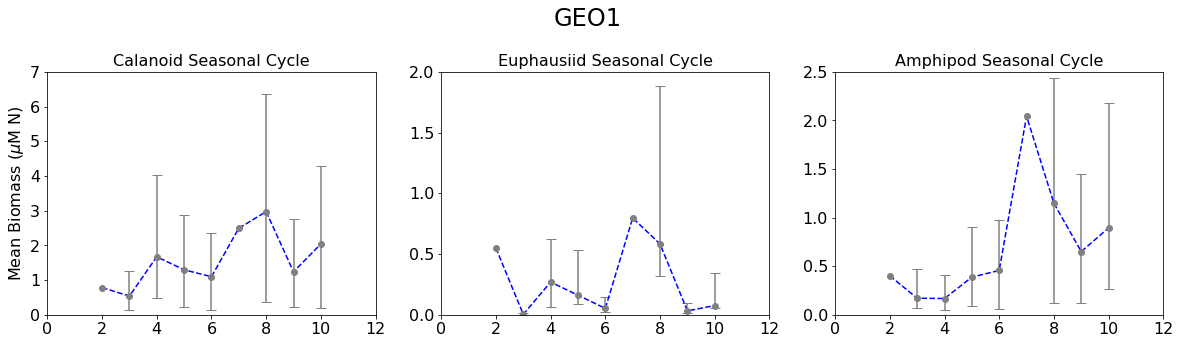

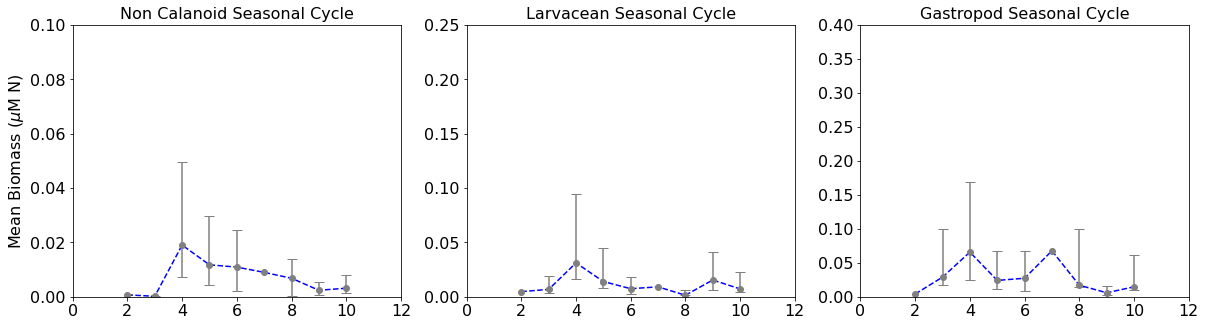

In [96]:

fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('GEO1', fontsize=24)
fig.subplots_adjust(top=0.8)
ax[0].errorbar(monthlymeanGEO1.index,logt_inv(monthlymeanGEO1['L10Calanoida']),
               yerr=logt_inv(np.array([monthlymeanGEO1['L10Calanoida']-monthlysemGEO1['L10Calanoida'],
                 monthlymeanGEO1['L10Calanoida']+monthlysemGEO1['L10Calanoida']])),
               fmt='o',color='gray',capsize=5)
ax[0].plot(logt_inv(monthlymeanGEO1['L10Calanoida']),'b--')
ax[1].errorbar(monthlymeanGEO1.index,logt_inv(monthlymeanGEO1['L10Euphausiacea']),
               yerr=logt_inv(np.array([monthlymeanGEO1['L10Euphausiacea']-monthlysemGEO1['L10Euphausiacea'],
                 monthlymeanGEO1['L10Euphausiacea']+monthlysemGEO1['L10Euphausiacea']])),
               fmt='o',color='gray',capsize=5)
ax[1].plot(logt_inv(monthlymeanGEO1['L10Euphausiacea']),'b--')
ax[2].errorbar(monthlymeanGEO1.index,logt_inv(monthlymeanGEO1['L10Amphipoda']),
               yerr=logt_inv(np.array([monthlymeanGEO1['L10Amphipoda']-monthlysemGEO1['L10Amphipoda'],
                 monthlymeanGEO1['L10Amphipoda']+monthlysemGEO1['L10Amphipoda']])),
               fmt='o',color='gray',capsize=5)
ax[2].plot(logt_inv(monthlymeanGEO1['L10Amphipoda']),'b--')
ax[0].set_title('Calanoid Seasonal Cycle')
ax[1].set_title('Euphausiid Seasonal Cycle')
ax[2].set_title('Amphipod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass ($\mu$M N)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[0].set_ylim(0,7)
ax[1].set_ylim(0,2)
ax[2].set_ylim(0,2.5)

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].errorbar(monthlymeanGEO1.index,logt_inv(monthlymeanGEO1['L10Poecilostomatoida']),
               yerr=logt_inv(np.array([monthlymeanGEO1['L10Poecilostomatoida']-monthlysemGEO1['L10Poecilostomatoida'],
                 monthlymeanGEO1['L10Poecilostomatoida']+monthlysemGEO1['L10Poecilostomatoida']])),
               fmt='o',color='gray',capsize=5)
ax[0].plot(logt_inv(monthlymeanGEO1['L10Poecilostomatoida']),'b--')
ax[1].errorbar(monthlymeanGEO1.index,logt_inv(monthlymeanGEO1['L10Copelata']),
               yerr=logt_inv(np.array([monthlymeanGEO1['L10Copelata']-monthlysemGEO1['L10Copelata'],
                 monthlymeanGEO1['L10Copelata']+monthlysemGEO1['L10Copelata']])),
               fmt='o',color='gray',capsize=5)
ax[1].plot(logt_inv(monthlymeanGEO1['L10Copelata']),'b--')
ax[2].errorbar(monthlymeanGEO1.index,logt_inv(monthlymeanGEO1['L10Decapoda']),
               yerr=logt_inv(np.array([monthlymeanGEO1['L10Decapoda']-monthlysemGEO1['L10Decapoda'],
                 monthlymeanGEO1['L10Decapoda']+monthlysemGEO1['L10Decapoda']])),
               fmt='o',color='gray',capsize=5)
ax[2].plot(logt_inv(monthlymeanGEO1['L10Decapoda']),'b--')
ax[0].set_title('Non Calanoid Seasonal Cycle')
ax[1].set_title('Larvacean Seasonal Cycle')
ax[2].set_title('Gastropod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass ($\mu$M N)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[0].set_ylim(0,.1)
ax[1].set_ylim(0,.25)
ax[2].set_ylim(0,.4)


Text(0, 0.5, 'Mean Biomass ($\\mu$M N)')

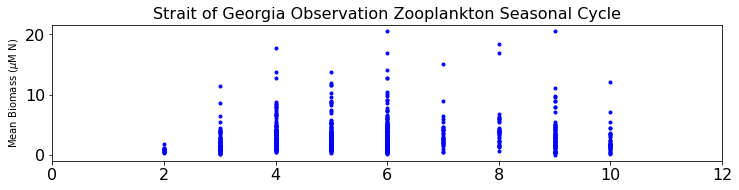

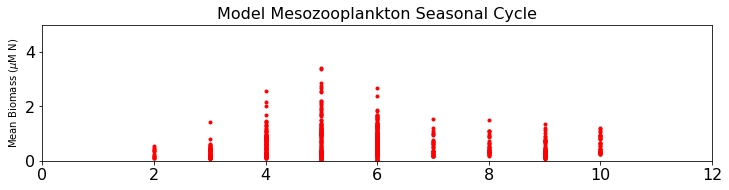

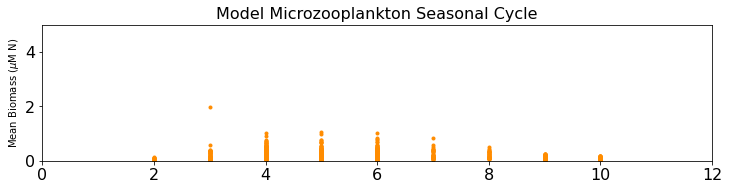

In [97]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(monthTotal['Month'],monthTotal['Total'],'.',color='blue',label='Obs Total Zoop')
ax.set_xlim(0,12)
ax.set_title('Strait of Georgia Observation Zooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(monthModMeso['Month'],monthModMeso['mod_mesozooplankton'],'.',color='red',label='Model Microzoop')
ax.set_ylim(0,5)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(monthModMicro['Month'],monthModMicro['mod_microzooplankton'],'.',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,5)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)

Text(0, 0.5, 'Mean Biomass ($\\mu$M N)')

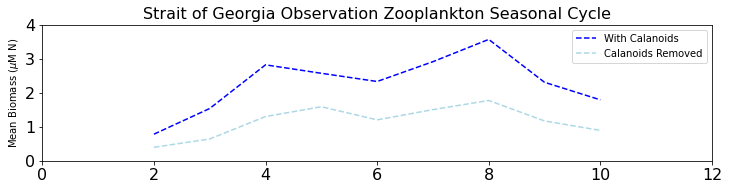

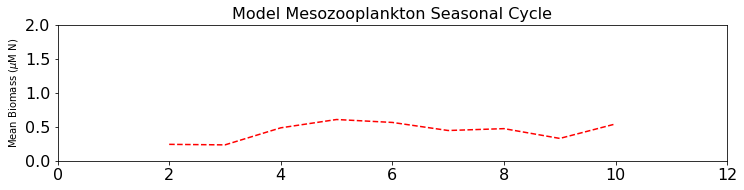

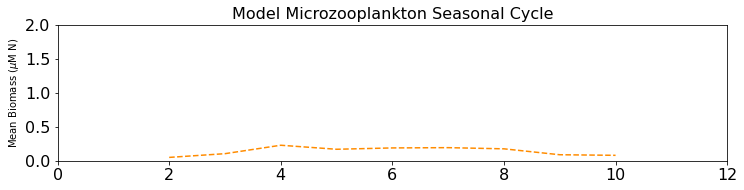

In [101]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10Total']),'--',color='blue',label='With Calanoids')
ax.plot(logt_inv(monthlymean['L10TotalCalRemoved']),'--',color='lightblue',label='Calanoids Removed')
ax.set_ylim(0,4)
ax.set_xlim(0,12)
ax.set_title('Strait of Georgia Observation Zooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,2)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,2)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)

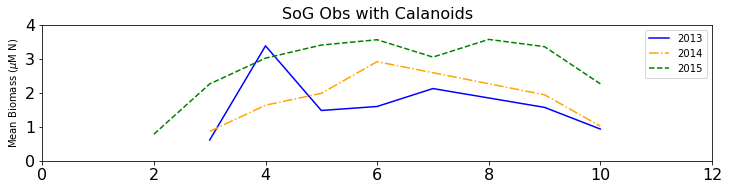

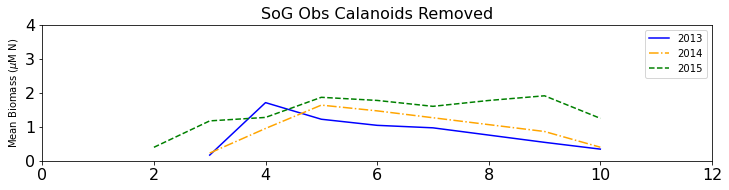

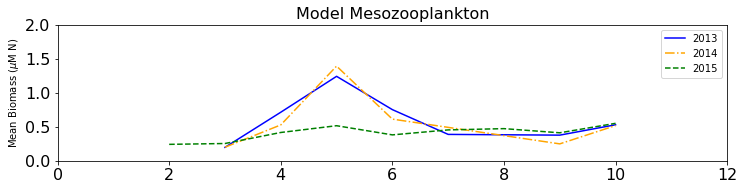

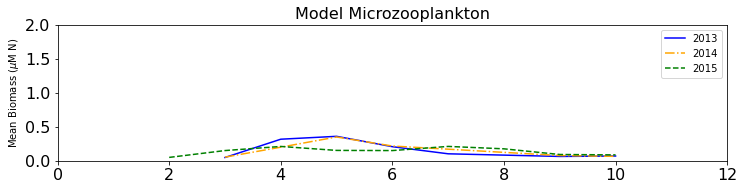

In [102]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))

ax.plot(logt_inv(monthlymean2013['L10Total']),'-',color='blue',label='2013')
ax.plot(logt_inv(monthlymean2014['L10Total']),'-.',color='orange',label='2014')
ax.plot(logt_inv(monthlymean2015['L10Total']),'--',color='green',label='2015')
ax.set_ylim(0,4)
ax.set_xlim(0,12)
ax.set_title('SoG Obs with Calanoids')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean2013['L10TotalCalRemoved']),'-',color='blue',label='2013')
ax.plot(logt_inv(monthlymean2014['L10TotalCalRemoved']),'-.',color='orange',label='2014')
ax.plot(logt_inv(monthlymean2015['L10TotalCalRemoved']),'--',color='green',label='2015')
ax.set_ylim(0,4)
ax.set_xlim(0,12)
ax.set_title('SoG Obs Calanoids Removed')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean2013['L10mod_mesozooplankton']),'-',color='blue',label='2013')
ax.plot(logt_inv(monthlymean2014['L10mod_mesozooplankton']),'-.',color='orange',label='2014')
ax.plot(logt_inv(monthlymean2015['L10mod_mesozooplankton']),'--',color='green',label='2015')
ax.set_ylim(0,2)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean2013['L10mod_microzooplankton']),'-',color='blue',label='2013')
ax.plot(logt_inv(monthlymean2014['L10mod_microzooplankton']),'-.',color='orange',label='2014')
ax.plot(logt_inv(monthlymean2015['L10mod_microzooplankton']),'--',color='green',label='2015')
ax.set_ylim(0,2)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)

Text(0, 0.5, 'Mean Biomass ($\\mu$M N)')

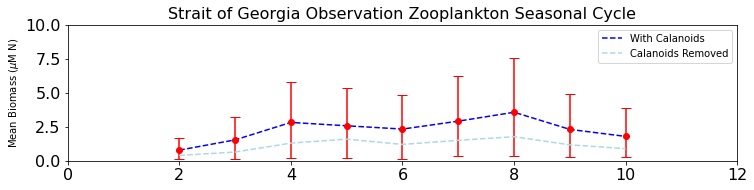

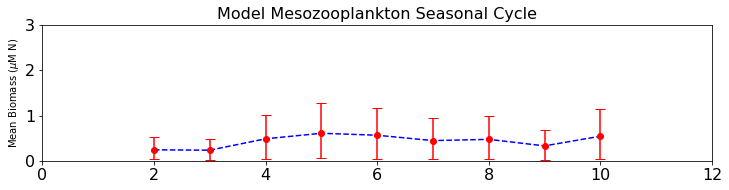

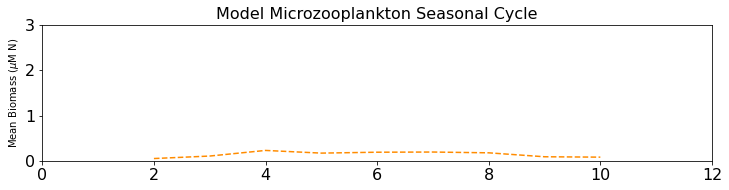

In [105]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.errorbar(monthlymean.index,logt_inv(monthlymean['L10Total']),
               yerr=logt_inv(np.array([monthlymean['L10Total']-monthlysem['L10Total'],
                 monthlymean['L10Total']+monthlysem['L10Total']])),
               fmt='ro',capsize=5)
ax.plot(logt_inv(monthlymean['L10Total']),'--',color='blue',label='With Calanoids')
ax.plot(logt_inv(monthlymean['L10TotalCalRemoved']),'--',color='lightblue',label='Calanoids Removed')
ax.set_ylim(0,10)
ax.set_xlim(0,12)
ax.set_title('Strait of Georgia Observation Zooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.errorbar(monthlymean.index,logt_inv(monthlymean['L10mod_mesozooplankton']),
               yerr=logt_inv(np.array([monthlymean['L10mod_mesozooplankton']-monthlysem['L10mod_mesozooplankton'],
                 monthlymean['L10mod_mesozooplankton']+monthlysem['L10mod_mesozooplankton']])),
               fmt='ro',capsize=5)
ax.plot(logt_inv(monthlymean['L10mod_mesozooplankton']),'--',color='blue',label='Model Mesozooplankton')
ax.set_ylim(0,3)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,3)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)

In [73]:
cm1=cmocean.cm.thermal
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

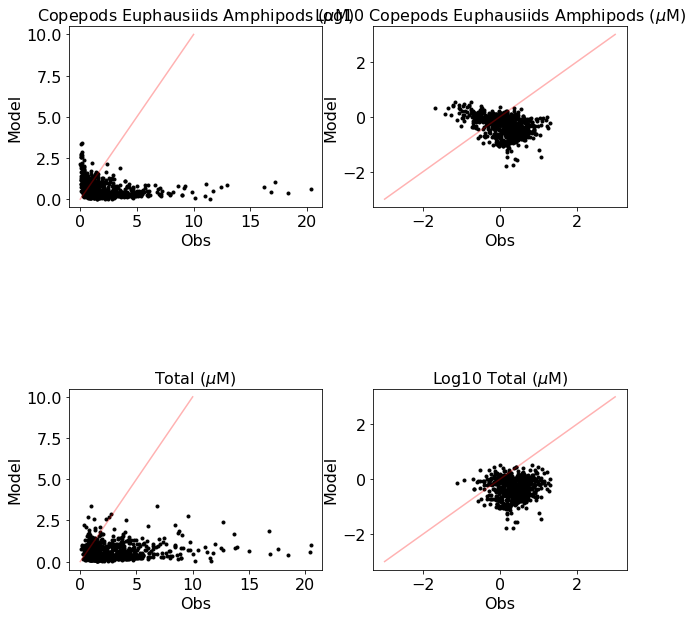

In [74]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.subplots_adjust(hspace=1)
ax=ax.flatten()
ax[0].plot(data['Calanoida']+data['Euphausiacea']+data['Amphipoda'],data['mod_mesozooplankton'],'k.')
ax[0].set_title('Copepods Euphausiids Amphipods ($\mu$M)')
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].plot((0,10),(0,10),'r-',alpha=.3)

ax[1].plot(logt(data['Calanoida']+data['Euphausiacea']+data['Amphipoda']),logt(data['mod_mesozooplankton']),'k.')
ax[1].set_title('Log10 Copepods Euphausiids Amphipods ($\mu$M)')
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].plot((-3,3),(-3,3),'r-',alpha=.3)

ax[2].plot(data['Calanoida']+data['Euphausiacea']+data['Amphipoda']+data['Decapoda']+data['Copelata'],data['mod_mesozooplankton'],'k.')
ax[2].set_title('Total ($\mu$M)')
ax[2].set_xlabel('Obs')
ax[2].set_ylabel('Model')
ax[2].plot((0,10),(0,10),'r-',alpha=.3)

ax[3].plot(logt(data['Calanoida']+data['Euphausiacea']+data['Amphipoda']+data['Decapoda']+data['Copelata']),logt(data['mod_mesozooplankton']),'k.')
ax[3].set_title('Log10 Total ($\mu$M)')
ax[3].set_xlabel('Obs')
ax[3].set_ylabel('Model')
ax[3].plot((-3,3),(-3,3),'r-',alpha=.3)

In [75]:
#fig,ax=plt.subplots(1,1,figsize=(10,10))
#ax.plot((data['L10Calanoida']),(data['L10mod_mesozooplankton']),'k.')
#ax.set_title('Log10 Total ($\mu$M)')
#ax.set_xlabel('Obs')
#ax.set_ylabel('Model')
#ax.plot((-3,3),(-3,3),'r-',alpha=.3)

In [76]:
def yd(idt):
    if type(idt)==dt.datetime:
        yd=(idt-dt.datetime(idt.year-1,12,31)).days
    else: # assume array or pandas
        yd=[(ii-dt.datetime(ii.year-1,12,31)).days for ii in idt]
    return yd

data['yd']=yd(data['dtUTC'])
data['Year']=[ii.year for ii in data['dtUTC']]

#### By Day of Year

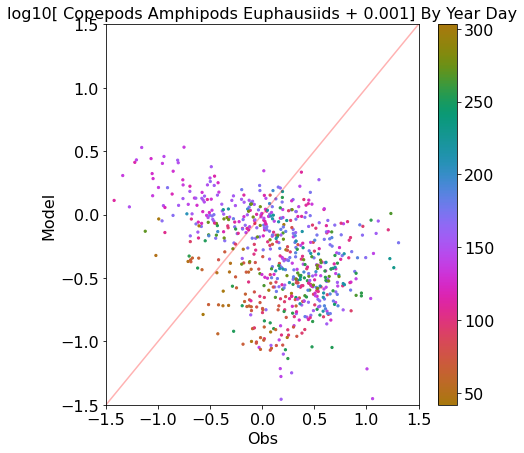

In [77]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
m=ax.scatter(logt(data['Calanoida']+data['Euphausiacea']+data['Amphipoda']),logt(data['mod_mesozooplankton']),
          c=data['yd'],s=5,cmap=cmocean.cm.phase)

ax.set_title('log10[ Copepods Amphipods Euphausiids + 0.001] By Year Day')
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.plot((-6,5),(-6,5),'r-',alpha=.3)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5);
fig.colorbar(m)

In [78]:
data['Month']=[ii.month for ii in data['dtUTC']]
JF=data.loc[(data.Month==1)|(data.Month==2)]
MAM=data.loc[(data.Month==3)|(data.Month==4)|(data.Month==5)]
JJA=data.loc[(data.Month==6)|(data.Month==7)|(data.Month==8)]
SOND=data.loc[(data.Month==9)|(data.Month==10)|(data.Month==11)|(data.Month==12)]

In [79]:


def byRegion(ax,obsvar,modvar,lims):
    SoG=[]
    for ind, iregion in enumerate(data.region_name.unique()):
        #ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
                #color = colors[ind], label=iregion)
        SoG0=et.varvarPlot(ax,datreg[iregion],obsvar,modvar,
                          cols=(colors[ind],),lname=iregion)
        SoG.append(SoG0)
    l=ax.legend(handles=[ip[0][0] for ip in SoG])
    ax.set_xlabel('Obs')
    ax.set_ylabel('Model')
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SoG,l



In [80]:
def bySeason(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
        axi.set_ylabel('Model')
    SoG=et.varvarPlot(ax[0],JF,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    SoG=et.varvarPlot(ax[1],MAM,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SoG=et.varvarPlot(ax[2],JJA,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SoG=et.varvarPlot(ax[3],SOND,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 

In [81]:
#obsvar='L10Calanoida'
#modvar='L10mod_mesozooplankton'

### Plots of Calanoid copepods vs. model mesozooplankton 2015

IndexError: tuple index out of range

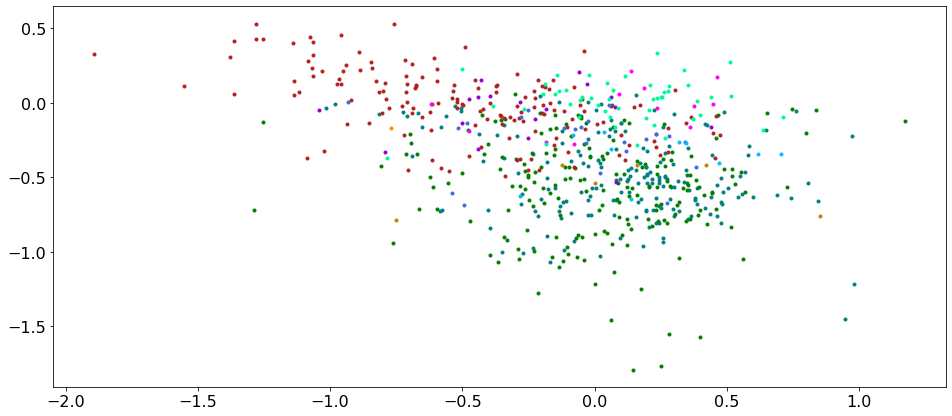

In [82]:
fig, ax = plt.subplots(1,1,figsize = (16,7))     
SoG,l=byRegion(ax,'L10Calanoida','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Calanoida + 0.001 ($\mu$M) By Region')
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Calanoida','L10mod_mesozooplankton',(-1.5,1.5))


#### 

In [83]:
#obsvar='Euphausiacea'
#modvar='mod_mesozooplankton'

### Plots of Euphausiids vs. model mesozooplankton 2015

IndexError: tuple index out of range

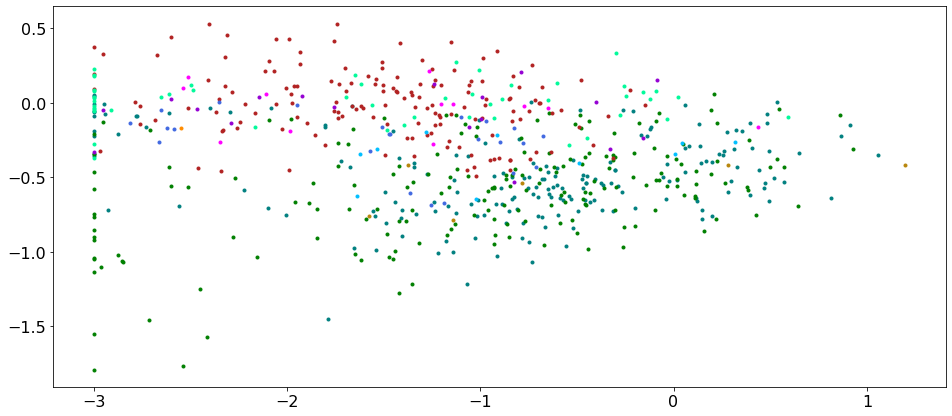

In [84]:
fig, ax = plt.subplots(1,1,figsize = (16,7))
SoG,l=byRegion(ax,'L10Euphausiacea','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Euphausiacea + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Euphausiacea','L10mod_mesozooplankton',(-1.5,1.5))

### Plots of Amphipods vs. model mesozooplankton 2015

IndexError: tuple index out of range

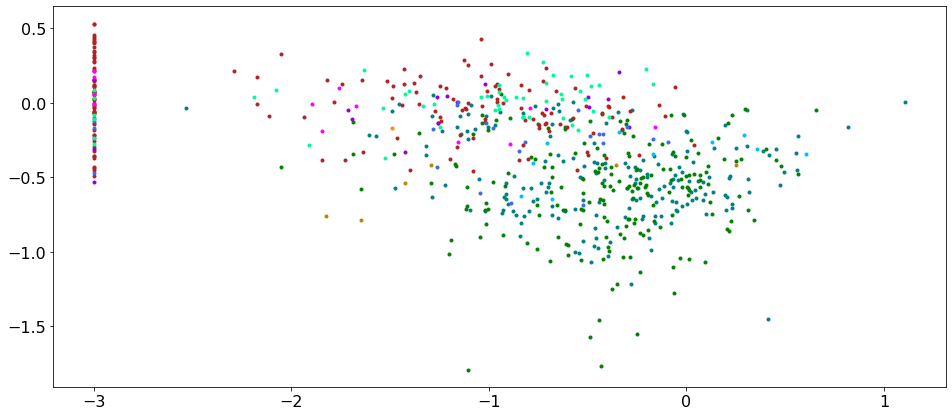

In [85]:
fig, ax = plt.subplots(1,1,figsize = (16,7))
SoG,l=byRegion(ax,'L10Amphipoda','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Amphipoda + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Amphipoda','L10mod_mesozooplankton',(-1.5,1.5))

### Decapods vs. model mesozooplankton 2015

IndexError: tuple index out of range

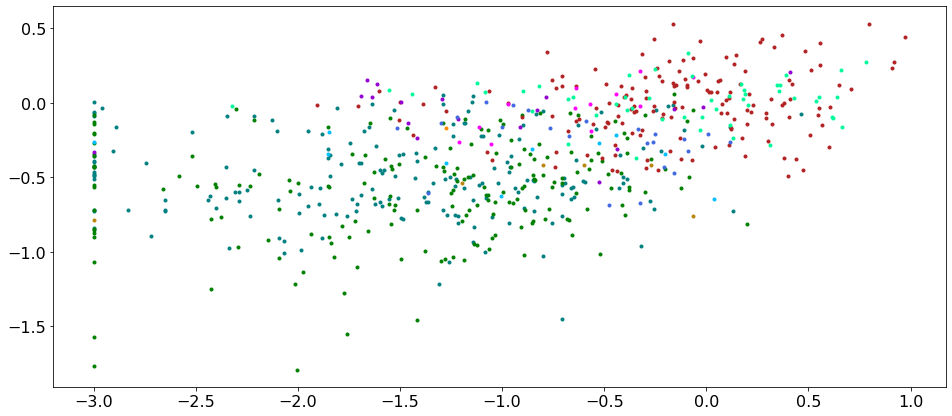

In [86]:
fig, ax = plt.subplots(1,1,figsize = (16,7))
SoG,l=byRegion(ax,'L10Decapoda','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Decapoda + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Decapoda','L10mod_mesozooplankton',(-1.5,1.5))

### Larvaceans vs. model mesozooplankton 2015

IndexError: tuple index out of range

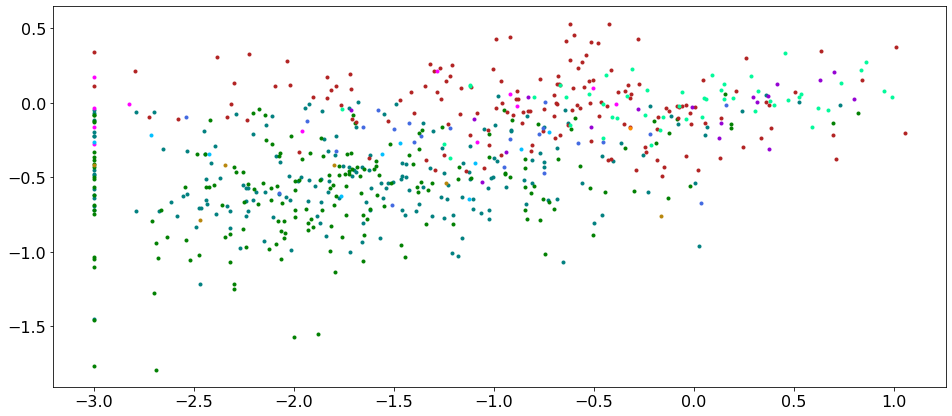

In [87]:
fig, ax = plt.subplots(1,1,figsize = (16,7))
SoG,l=byRegion(ax,'L10Copelata','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Larvaceans + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Copelata','L10mod_mesozooplankton',(-1.5,1.5))

### Plots of Cyclopoid copepods vs. model mesozooplankton 2015

IndexError: tuple index out of range

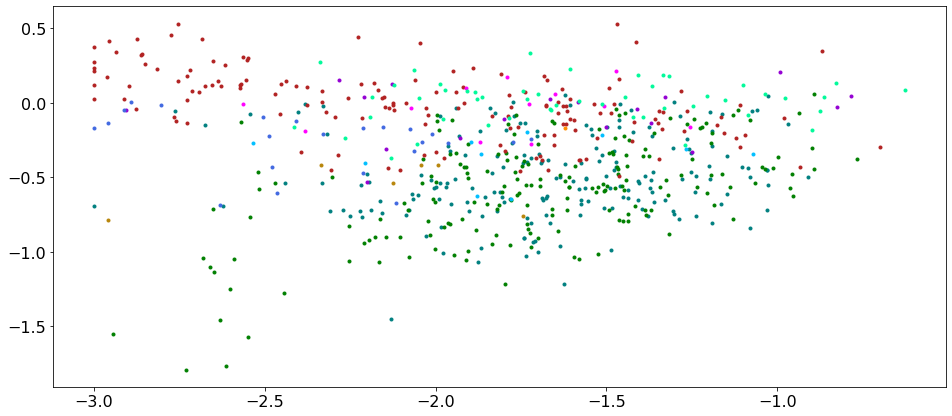

In [88]:
fig, ax = plt.subplots(1,1,figsize = (16,7))

SoG,l=byRegion(ax,'L10Cyclopoida','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Cyclopoida + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Cyclopoida','L10mod_mesozooplankton',(-1.5,1.5))

### Calanoid copepods vs. model microzooplankton from Mar-Jun 2015

IndexError: tuple index out of range

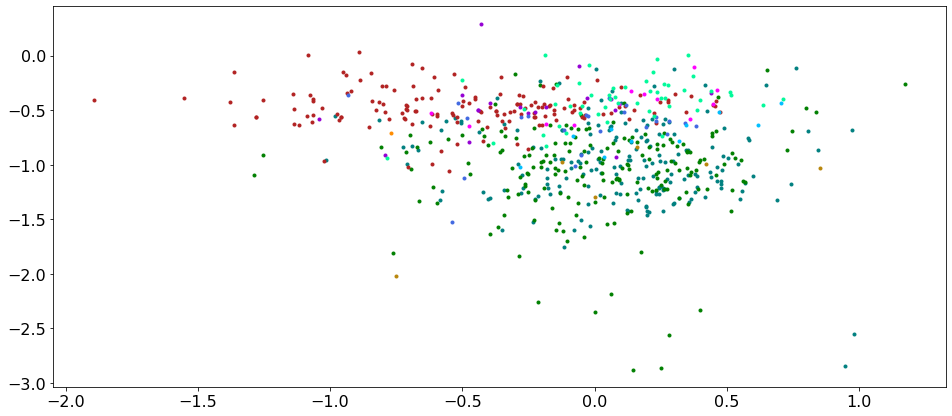

In [89]:
fig, ax = plt.subplots(1,1,figsize = (16,7))

SoG,l=byRegion(ax,'L10Calanoida','L10mod_microzooplankton',(-1.5,1.5))
ax.set_title('Log10 Calanoida +0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Cyclopoida','L10mod_mesozooplankton',(-1.5,1.5))

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (16,7))

SoG,l=byRegion(ax,'L10Copelata','L10mod_microzooplankton',(-1.5,1.5))
ax.set_title('Log10 Larvaceans +0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Copelata','L10mod_microzooplankton',(-1.5,1.5))


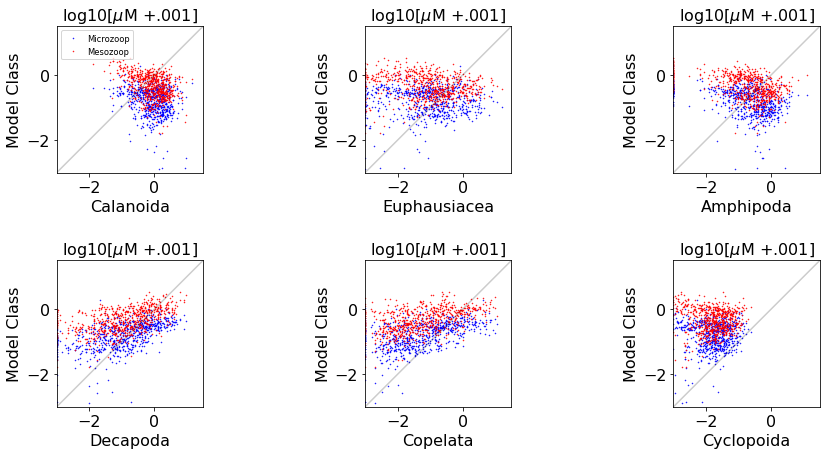

In [90]:
fig,ax=plt.subplots(2,3,figsize=(15,7))
fig.subplots_adjust(wspace=.4)
fig.subplots_adjust(hspace=.6)
ax=ax.flatten()

chplc=('Calanoida', 'Euphausiacea','Amphipoda','Decapoda', 'Copelata', 'Cyclopoida')

mvar1=data['mod_microzooplankton']
mvar2=data['mod_mesozooplankton']

for ii in range(0,len(chplc)):
    ax[ii].plot(logt(data.loc[:,[chplc[ii]]].values),logt(mvar1),'.',ms=1,color='blue',label='Microzoop')
    ax[ii].plot(logt(data.loc[:,[chplc[ii]]].values),logt(mvar2),'.',ms=1,color='red',label='Mesozoop')
    ax[ii].set_ylabel('Model Class')
    ax[ii].set_xlabel(chplc[ii])
    ax[ii].set_title('log10[$\mu$M +.001]')
    ax[ii].plot((-3,1.5),(-3,1.5),'k-',alpha=.2)
    ax[ii].set_xlim((-3,1.5))
    ax[ii].set_ylim((-3,1.5))
    ax[ii].set_aspect(1)
ax[0].legend(loc=2, fontsize = 'small')